<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Marco Roco Arias</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


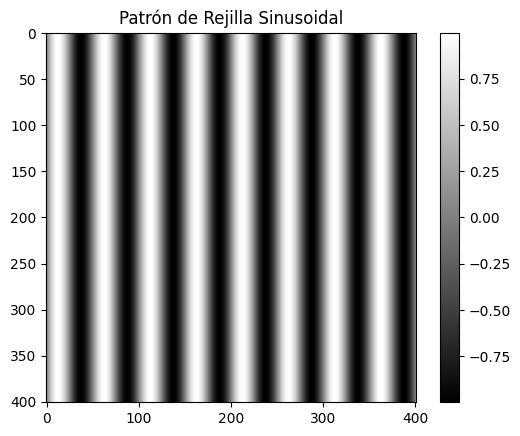

In [1]:

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-800, 801, 4)

X, Y = np.meshgrid(x, x)

ldeonda = 200
rejilla = np.sin(2 * np.pi * X / ldeonda)

plt.imshow(rejilla, cmap='gray')
plt.title('Patrón de Rejilla Sinusoidal')
plt.colorbar()
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


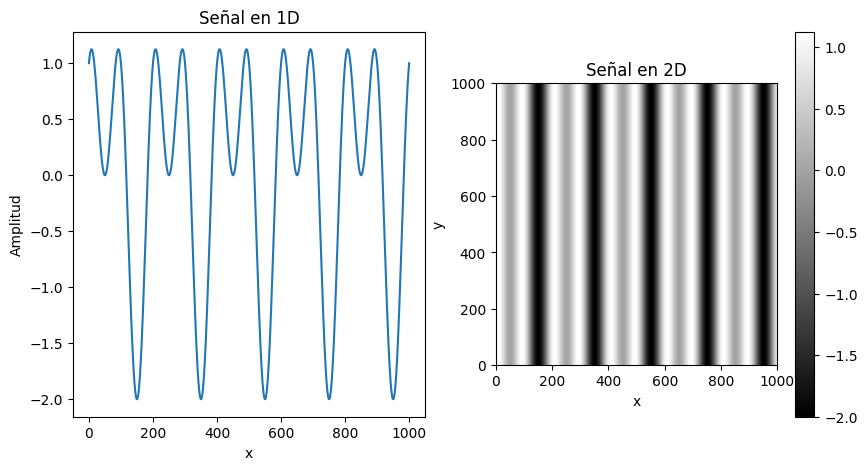

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1001, 1)

X, Y = np.meshgrid(x, x)

longitud_de_onda = 200
rejilla = np.sin(2 * np.pi * X / longitud_de_onda) + np.cos(2 * (2 * np.pi * X / longitud_de_onda))

# Graficar la señal en 1D
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, rejilla[0, :])  # Tomar solo la primera fila para graficar en 1D
plt.title('Señal en 1D')
plt.xlabel('x')
plt.ylabel('Amplitud')

# Graficar la señal en 2D
plt.subplot(1, 2, 2)
plt.imshow(rejilla, cmap='gray', extent=[0, 1000, 0, 1000])
plt.title('Señal en 2D')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

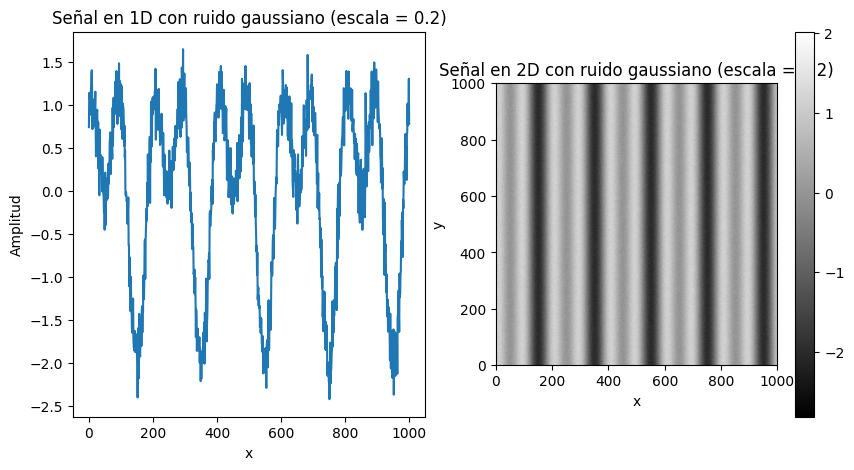

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.arange(0, 1001, 1)

# Generar la señal sinusoidal
longitud_de_onda = 200
rejilla_sin_ruido = np.sin(2 * np.pi * x / longitud_de_onda) + np.cos(2 * (2 * np.pi * x / longitud_de_onda))

# Generar ruido gaussiano para la señal 1D
ruido_1d = np.random.normal(loc=0, scale=0.2, size=len(x))

# Agregar el ruido a la señal 1D
rejilla_con_ruido_1d = rejilla_sin_ruido + ruido_1d

# Generar ruido gaussiano para la señal 2D
ruido_2d = np.random.normal(loc=0, scale=0.2, size=(len(x), len(x)))

# Agregar el ruido a la señal 2D
rejilla_con_ruido_2d = rejilla_sin_ruido + ruido_2d

# Graficar la señal con ruido en 1D
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, rejilla_con_ruido_1d)
plt.title('Señal en 1D con ruido gaussiano (escala = 0.2)')
plt.xlabel('x')
plt.ylabel('Amplitud')

# Graficar la señal con ruido en 2D
plt.subplot(1, 2, 2)
plt.imshow(rejilla_con_ruido_2d, cmap='gray', extent=[0, 1000, 0, 1000])
plt.title('Señal en 2D con ruido gaussiano (escala = 0.2)')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


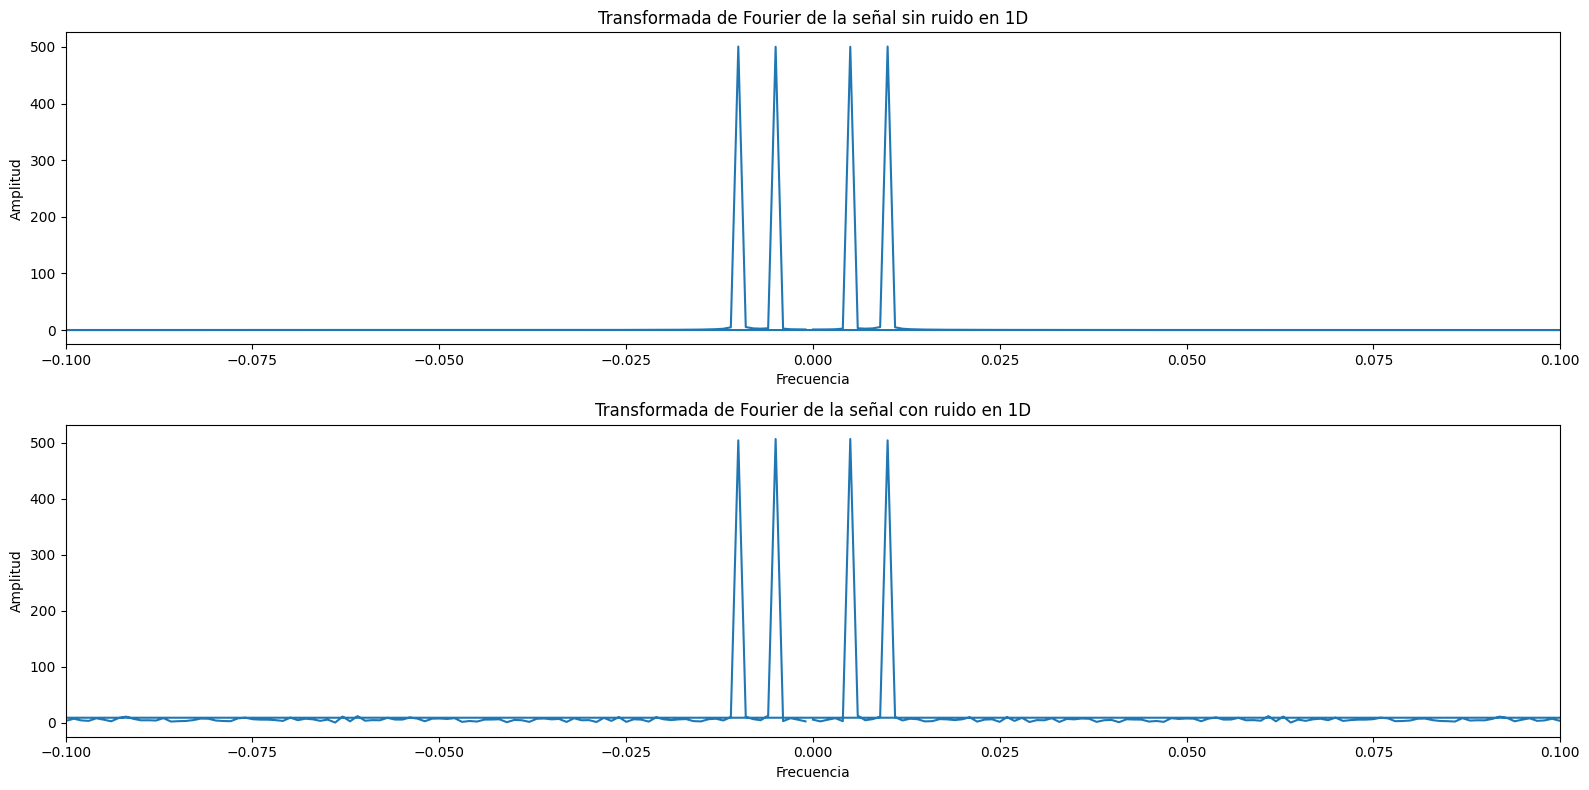

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.arange(0, 1001, 1)

# Generar la señal sinusoidal sin ruido
longitud_de_onda = 200
rejilla_sin_ruido = np.sin(2 * np.pi * x / longitud_de_onda) + np.cos(2 * (2 * np.pi * x / longitud_de_onda))

# Generar ruido gaussiano para la señal 1D
ruido_1d = np.random.normal(loc=0, scale=0.2, size=len(x))

# Agregar el ruido a la señal 1D
rejilla_con_ruido_1d = rejilla_sin_ruido + ruido_1d

# Calcular la Transformada de Fourier de la señal sin ruido en 1D
transformada_sin_ruido_1d = np.fft.fft(rejilla_sin_ruido)
frecuencias_sin_ruido_1d = np.fft.fftfreq(len(x), 1)

# Calcular la Transformada de Fourier de la señal con ruido en 1D
transformada_con_ruido_1d = np.fft.fft(rejilla_con_ruido_1d)
frecuencias_con_ruido_1d = np.fft.fftfreq(len(x), 1)

# Graficar las transformadas de Fourier de las señales en 1D
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(frecuencias_sin_ruido_1d, np.abs(transformada_sin_ruido_1d))
plt.title('Transformada de Fourier de la señal sin ruido en 1D')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-0.1, 0.1)


plt.subplot(2, 1, 2)
plt.plot(frecuencias_con_ruido_1d, np.abs(transformada_con_ruido_1d))
plt.title('Transformada de Fourier de la señal con ruido en 1D')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-0.1, 0.1)

plt.tight_layout()
plt.show()

### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

La normalización es útil para facilitar la interpretación de los resultados y garantizar que las amplitudes estén en un rango específico.

Existen diferentes formas de normalizar la transformada de Fourier, pero la mas comun consiste en dividir las amplitudes de las componentes de frecuencia por el número de muestras en la señal original . Esto asegura que la amplitud máxima posible en la transformada de Fourier sea 1, lo que facilita la comparación entre diferentes señales de entrada.

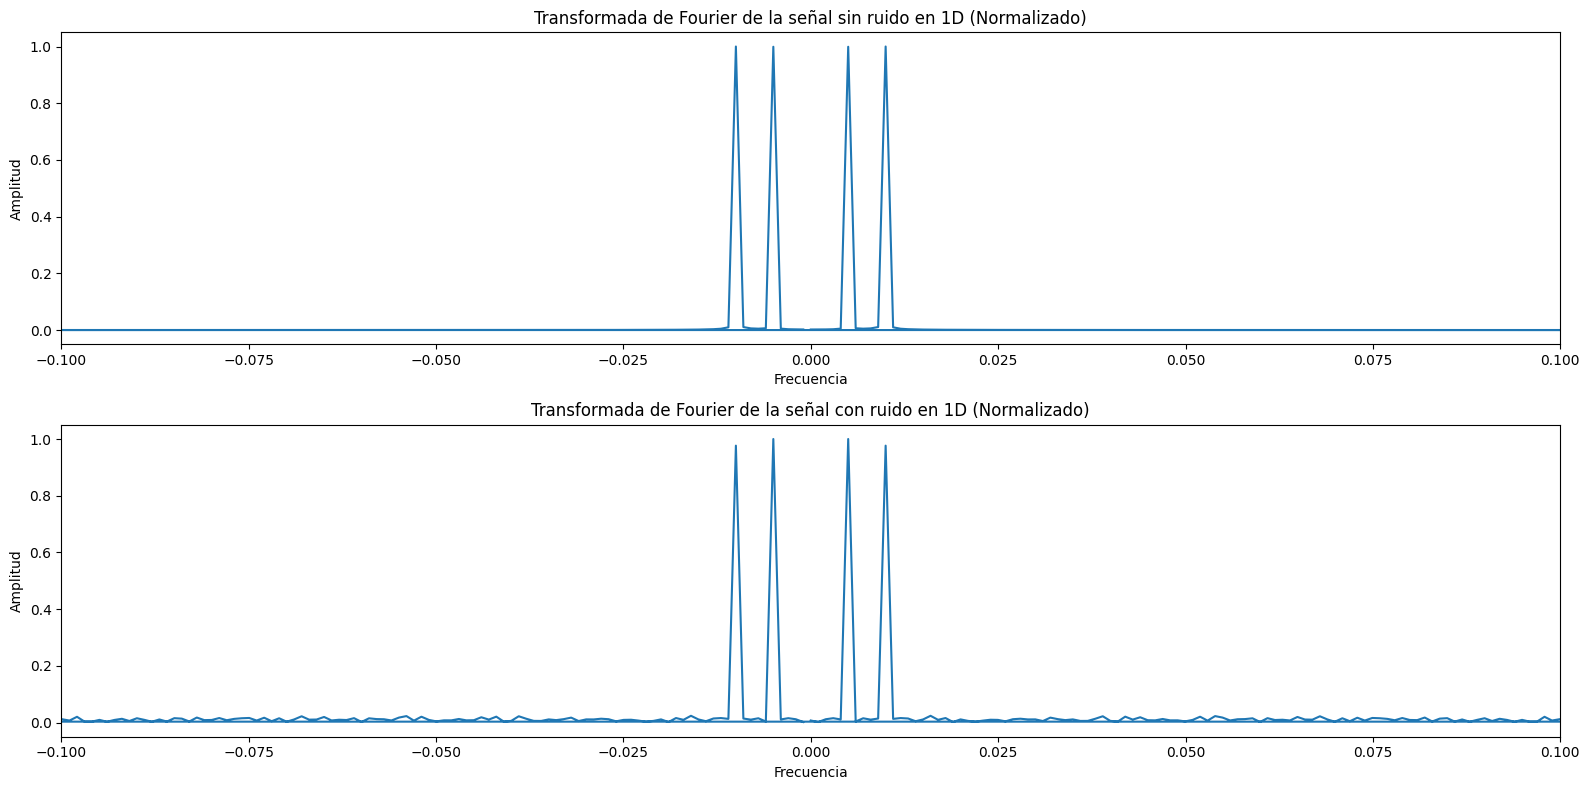

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.arange(0, 1001, 1)

# Generar la señal sinusoidal sin ruido
longitud_de_onda = 200
rejilla_sin_ruido = np.sin(2 * np.pi * x / longitud_de_onda) + np.cos(2 * (2 * np.pi * x / longitud_de_onda))

# Generar ruido gaussiano para la señal 1D
ruido_1d = np.random.normal(loc=0, scale=0.2, size=len(x))

# Agregar el ruido a la señal 1D
rejilla_con_ruido_1d = rejilla_sin_ruido + ruido_1d

# Calcular la Transformada de Fourier de la señal sin ruido en 1D
transformada_sin_ruido_1d = np.fft.fft(rejilla_sin_ruido)
frecuencias_sin_ruido_1d = np.fft.fftfreq(len(x), 1)

# Calcular la Transformada de Fourier de la señal con ruido en 1D
transformada_con_ruido_1d = np.fft.fft(rejilla_con_ruido_1d)
frecuencias_con_ruido_1d = np.fft.fftfreq(len(x), 1)

# Normalizar las amplitudes de las transformadas de Fourier
transformada_sin_ruido_1d /= np.max(np.abs(transformada_sin_ruido_1d))
transformada_con_ruido_1d /= np.max(np.abs(transformada_con_ruido_1d))

# Graficar las transformadas de Fourier de las señales en 1D
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(frecuencias_sin_ruido_1d, np.abs(transformada_sin_ruido_1d))
plt.title('Transformada de Fourier de la señal sin ruido en 1D (Normalizado)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-0.1, 0.1)

plt.subplot(2, 1, 2)
plt.plot(frecuencias_con_ruido_1d, np.abs(transformada_con_ruido_1d))
plt.title('Transformada de Fourier de la señal con ruido en 1D (Normalizado)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-0.1, 0.1)

plt.tight_layout()
plt.show()


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

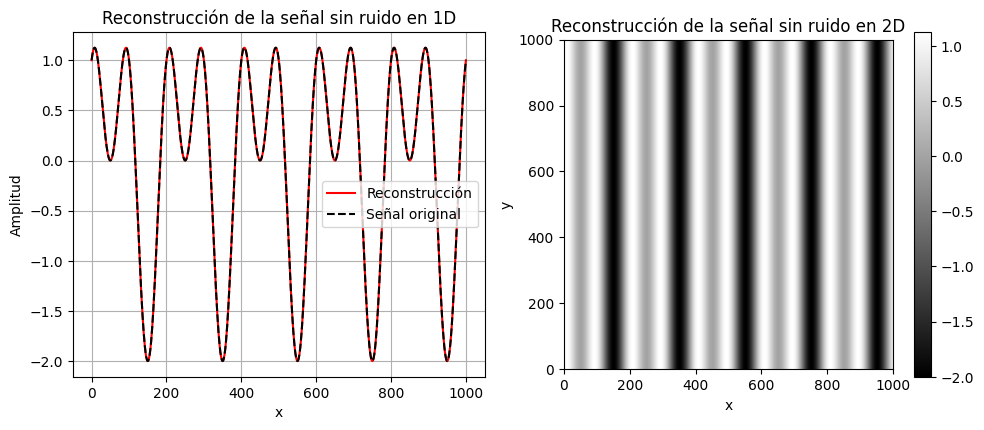

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.arange(0, 1001, 1)

# Generar la señal sinusoidal sin ruido
longitud_de_onda = 200
rejilla_sin_ruido = np.sin(2 * np.pi * x / longitud_de_onda) + np.cos(2 * (2 * np.pi * x / longitud_de_onda))

# Calcular la Transformada de Fourier de la señal sin ruido en 1D
transformada_sin_ruido_1d = np.fft.fft(rejilla_sin_ruido)
frecuencias_sin_ruido_1d = np.fft.fftfreq(len(x), 1)

# Calcular la transformada inversa de Fourier para obtener la señal original en 1D
reconstruccion_sin_ruido_1d = np.fft.ifft(transformada_sin_ruido_1d)

# Generar la señal sinusoidal sin ruido en 2D
X, Y = np.meshgrid(x, x)
rejilla_sin_ruido_2d = np.sin(2 * np.pi * X / longitud_de_onda) + np.cos(2 * (2 * np.pi * X / longitud_de_onda))

# Calcular la Transformada de Fourier de la señal sin ruido en 2D
transformada_sin_ruido_2d = np.fft.fft2(rejilla_sin_ruido_2d)

# Calcular la transformada inversa de Fourier para obtener la señal original en 2D
reconstruccion_sin_ruido_2d = np.fft.ifft2(transformada_sin_ruido_2d)

# Graficar las señales reconstruidas en 1D y 2D
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x, reconstruccion_sin_ruido_1d.real, label='Reconstrucción', color='red')
plt.plot(x, rejilla_sin_ruido, linestyle='--', label='Señal original', color='black')
plt.title('Reconstrucción de la señal sin ruido en 1D')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.imshow(reconstruccion_sin_ruido_2d.real, cmap='gray', extent=[0, 1000, 0, 1000])
plt.title('Reconstrucción de la señal sin ruido en 2D')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()



### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

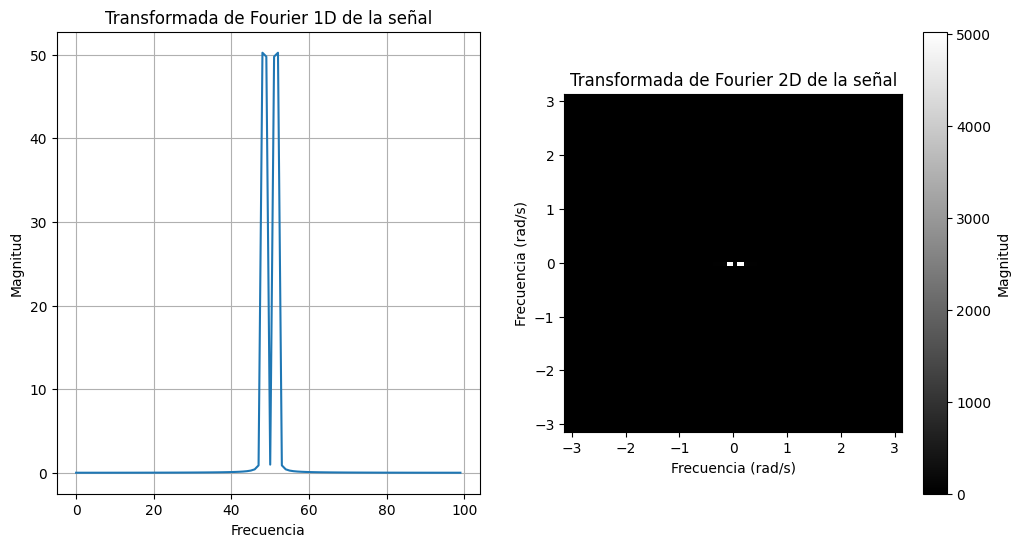

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)

# Señal en 1D
signal_1d = np.sin(x) + np.cos(2 * x)

# Señal en 2D
X, Y = np.meshgrid(x, y)
signal_2d = np.sin(X) + np.cos(2 * X)

# Calcular la DFT en 1D
dft_1d = np.fft.fft(signal_1d)

# Calcular la DFT en 2D
dft_2d = np.fft.fft2(signal_2d)

# Graficar la magnitud de la DFT en 1D
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(np.fft.fftshift(dft_1d)))
plt.title('Transformada de Fourier 1D de la señal')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)

# Graficar la magnitud de la DFT en 2D
plt.subplot(1, 2, 2)
plt.imshow(np.abs(np.fft.fftshift(dft_2d)), cmap='gray', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.title('Transformada de Fourier 2D de la señal')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Frecuencia (rad/s)')
plt.colorbar(label='Magnitud')
plt.show()




### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.

En el primer caso, el ruido gaussiano se agrega directamente al dominio temporal de la señal, introduciendo fluctuaciones aleatorias en la amplitud a lo largo de la señal original. Cada punto en la señal temporal se ve afectado por una cantidad aleatoria extraída de una distribución gaussiana.

En el segundo caso, el ruido gaussiano se agrega al dominio espacial de la señal bidimensional, lo que resulta en una variación aleatoria de la amplitud en todo el espacio bidimensional. Cada punto en la rejilla bidimensional se perturba aleatoriamente de acuerdo con una distribución gaussiana.

En el dominio frecuencial, el efecto de ambos tipos de ruido será diferente. El ruido en el dominio temporal afectará todas las frecuencias de la señal, introduciendo picos de energía en las frecuencias cercanas a la frecuencia del ruido gaussiano. Por otro lado, el ruido en el dominio espacial afectará principalmente a las frecuencias más altas de la señal, ya que introduce variaciones aleatorias en la amplitud en el espacio 2D.

- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?


La transformada de Fourier para las rejillas representa la distribución de frecuencias espaciales presentes en la señal. La transformada de Fourier convierte la señal desde el dominio espacial al dominio de la frecuencia, lo que nos permite analizar las características de la señal en términos de las diferentes frecuencias presentes en ella.

En particular, la transformada de Fourier de una imagen bidimensional proporciona información sobre las frecuencias de los patrones presentes en la señal. 

En resumen, el resultado de la transformada de Fourier para las rejillas en el procesamiento de imágenes nos permite comprender la distribución de las frecuencias espaciales en la imagen, lo que es útil para realizar operaciones como filtrado, compresión, restauración y análisis de características.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html